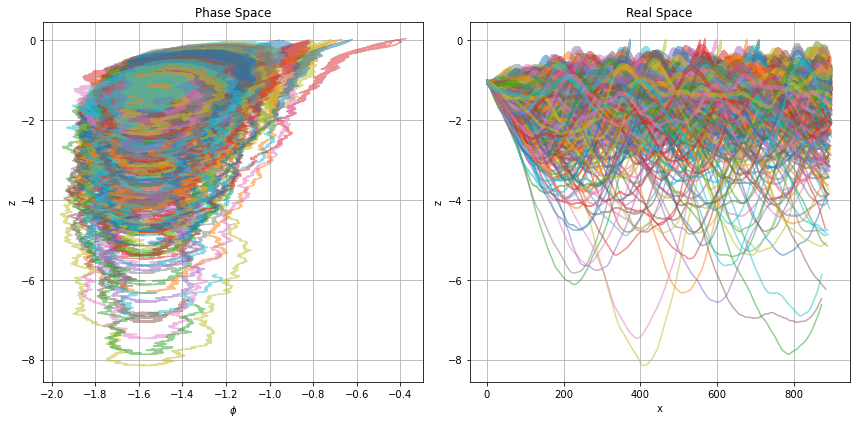

In [59]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.00001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 1
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 500

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]))*dt
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -1, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.5)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.5)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('MS_manypaths1.png', dpi=300)
plt.show()

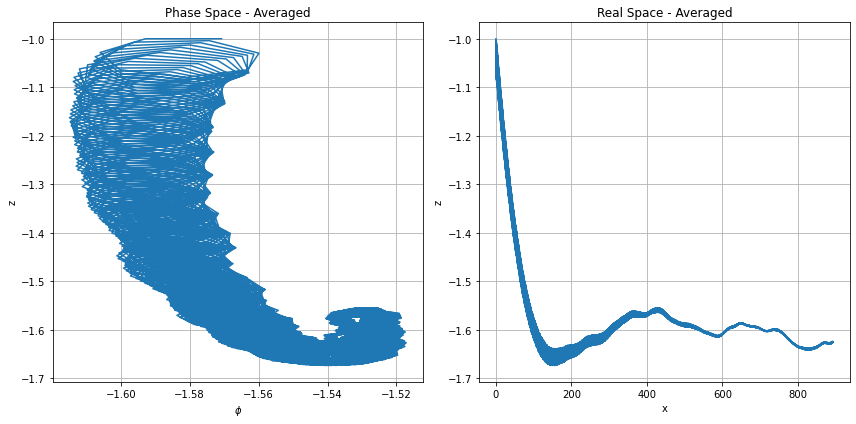

In [60]:
def average(paths, t):

    vpaths = []

    for x, z, phi in paths:
        if len(z) == len(t):
            vpaths.append((x, z, phi))

    xx, zz, pphi = [], [], []

    for x, z, phi in vpaths:
        xx.append(x)
        zz.append(z)
        pphi.append(phi)

    xx = np.array(xx)
    zz = np.array(zz)
    pphi = np.array(pphi)

    return xx.mean(axis=0), zz.mean(axis=0), pphi.mean(axis=0)
    
xm, zm, phim = average(paths, t)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(phim, zm)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space - Averaged')
ax1.grid()

ax2.plot(xm, zm)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space - Averaged')
ax2.grid()

plt.tight_layout() 
plt.savefig('MS_average1.png', dpi=300)
plt.show()


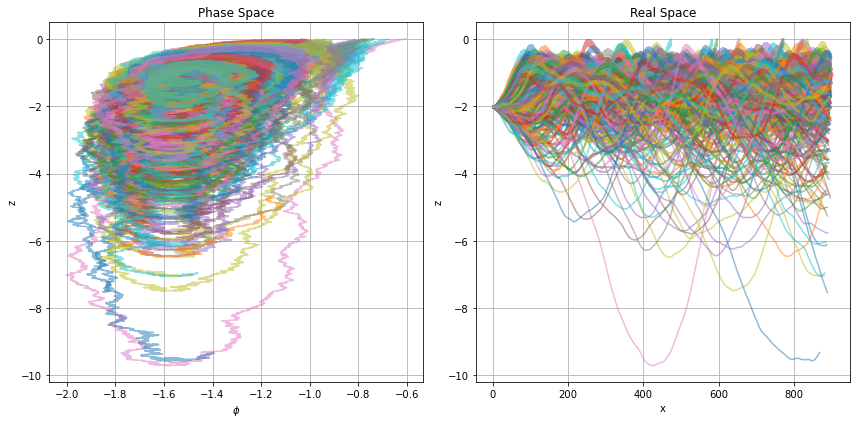

In [61]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.00001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 1
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 500

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]))*dt
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -2, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.5)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.5)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('MS_manypaths2.png', dpi=300)
plt.show()

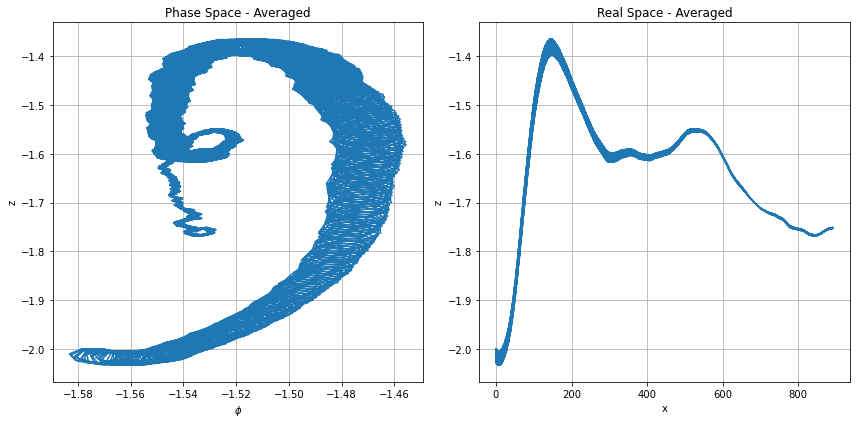

In [62]:
def average(paths, t):

    vpaths = []

    for x, z, phi in paths:
        if len(z) == len(t):
            vpaths.append((x, z, phi))

    xx, zz, pphi = [], [], []

    for x, z, phi in vpaths:
        xx.append(x)
        zz.append(z)
        pphi.append(phi)

    xx = np.array(xx)
    zz = np.array(zz)
    pphi = np.array(pphi)

    return xx.mean(axis=0), zz.mean(axis=0), pphi.mean(axis=0)
    
xm, zm, phim = average(paths, t)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(phim, zm)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space - Averaged')
ax1.grid()

ax2.plot(xm, zm)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space - Averaged')
ax2.grid()

plt.tight_layout() 
plt.savefig('MS_average2.png', dpi=300)
plt.show()


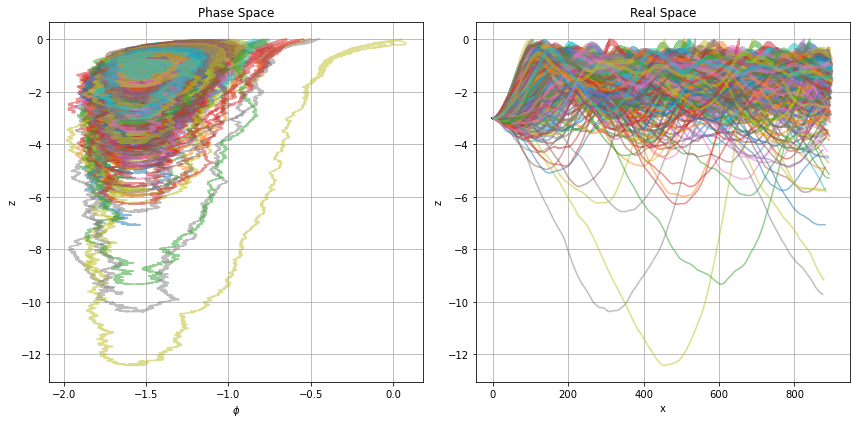

In [63]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.00001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 1
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 500

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]))*dt
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -3, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.5)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.5)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('MS_manypaths3.png', dpi=300)
plt.show()

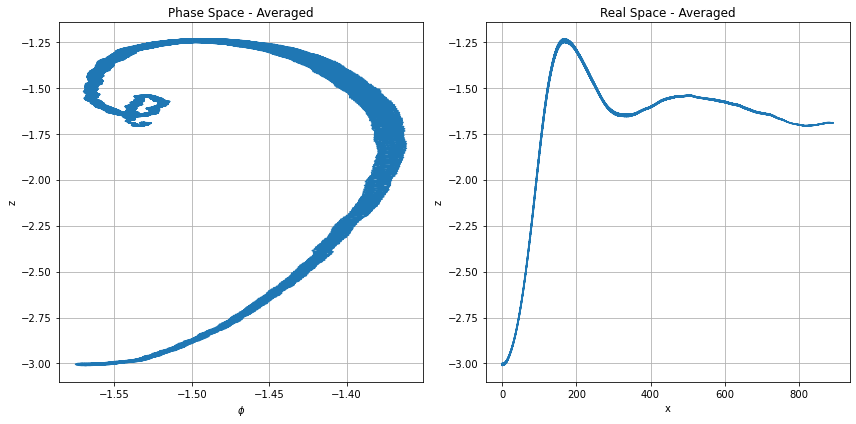

In [64]:
def average(paths, t):

    vpaths = []

    for x, z, phi in paths:
        if len(z) == len(t):
            vpaths.append((x, z, phi))

    xx, zz, pphi = [], [], []

    for x, z, phi in vpaths:
        xx.append(x)
        zz.append(z)
        pphi.append(phi)

    xx = np.array(xx)
    zz = np.array(zz)
    pphi = np.array(pphi)

    return xx.mean(axis=0), zz.mean(axis=0), pphi.mean(axis=0)
    
xm, zm, phim = average(paths, t)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(phim, zm)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space - Averaged')
ax1.grid()

ax2.plot(xm, zm)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space - Averaged')
ax2.grid()

plt.tight_layout() 
plt.savefig('MS_average3.png', dpi=300)
plt.show()


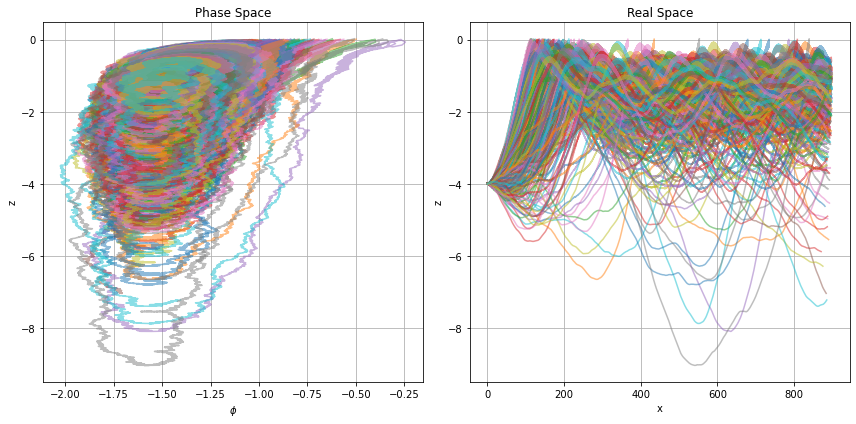

In [65]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.00001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 1
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 500

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]))*dt
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -4, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.5)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.5)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('MS_manypaths4.png', dpi=300)
plt.show()

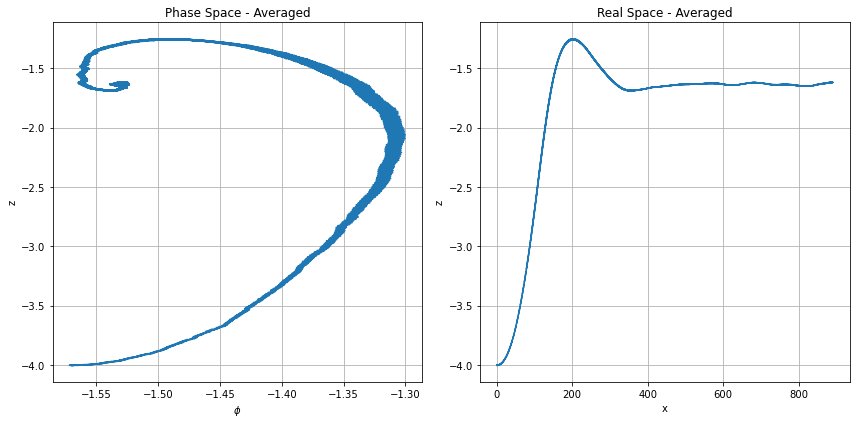

In [66]:
def average(paths, t):

    vpaths = []

    for x, z, phi in paths:
        if len(z) == len(t):
            vpaths.append((x, z, phi))

    xx, zz, pphi = [], [], []

    for x, z, phi in vpaths:
        xx.append(x)
        zz.append(z)
        pphi.append(phi)

    xx = np.array(xx)
    zz = np.array(zz)
    pphi = np.array(pphi)

    return xx.mean(axis=0), zz.mean(axis=0), pphi.mean(axis=0)
    
xm, zm, phim = average(paths, t)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(phim, zm)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space - Averaged')
ax1.grid()

ax2.plot(xm, zm)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space - Averaged')
ax2.grid()

plt.tight_layout() 
plt.savefig('MS_average4.png', dpi=300)
plt.show()


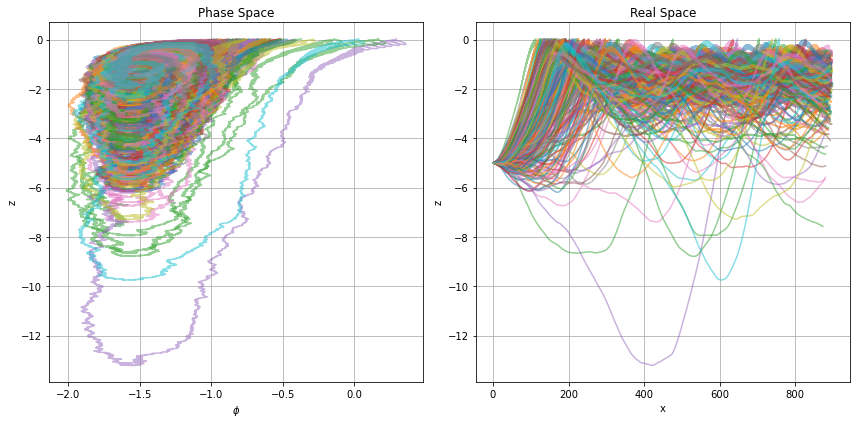

In [67]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.00001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 1
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 500

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]))*dt
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -5, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.5)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.5)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('MS_manypaths5.png', dpi=300)
plt.show()

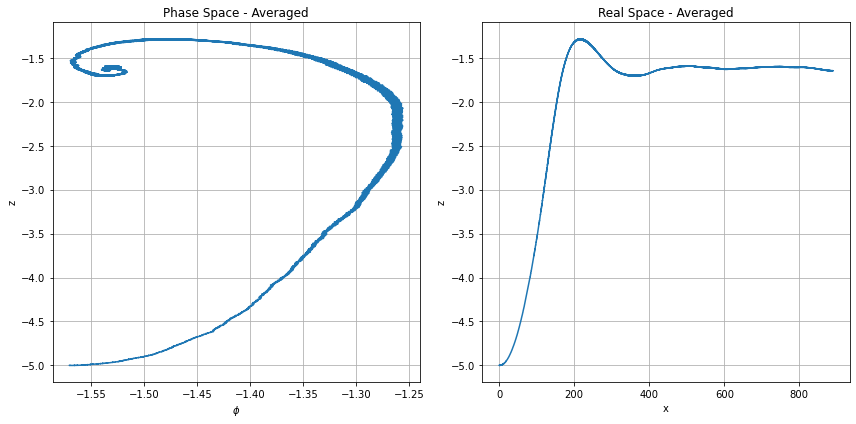

In [68]:
def average(paths, t):

    vpaths = []

    for x, z, phi in paths:
        if len(z) == len(t):
            vpaths.append((x, z, phi))

    xx, zz, pphi = [], [], []

    for x, z, phi in vpaths:
        xx.append(x)
        zz.append(z)
        pphi.append(phi)

    xx = np.array(xx)
    zz = np.array(zz)
    pphi = np.array(pphi)

    return xx.mean(axis=0), zz.mean(axis=0), pphi.mean(axis=0)
    
xm, zm, phim = average(paths, t)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(phim, zm)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space - Averaged')
ax1.grid()

ax2.plot(xm, zm)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space - Averaged')
ax2.grid()

plt.tight_layout() 
plt.savefig('MS_average5.png', dpi=300)
plt.show()


## Now longer time more trajectories and smaller dt

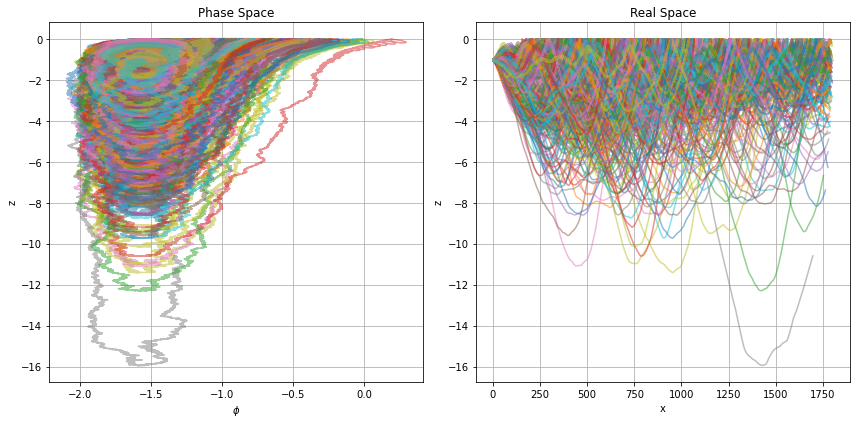

In [1]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.00001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 20000
dt = 0.1
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 1000

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]))*dt
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -1, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.5)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.5)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('longMS_manypaths1.png', dpi=300)
plt.show()

def save(paths, filename="manypaths1.npz"):
    
    xs = [p[0] for p in paths]
    zs = [p[1] for p in paths]
    phis = [p[2] for p in paths]

    np.savez(filename, xs=xs, zs=zs, phis=phis)


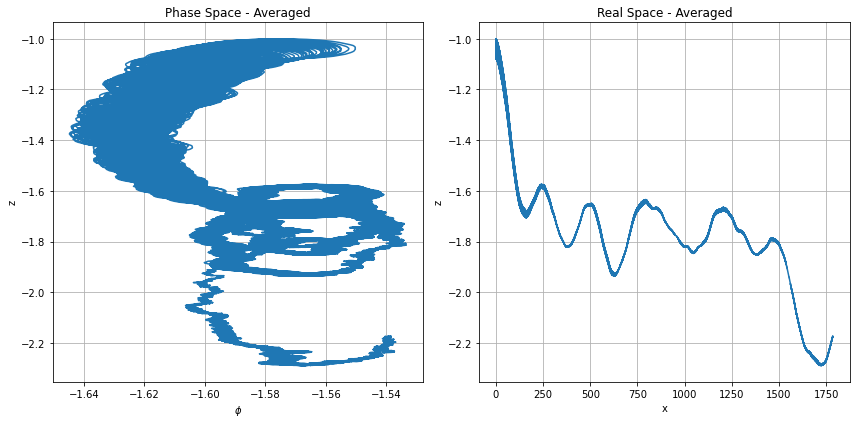

In [2]:
def average(paths, t):

    vpaths = []

    for x, z, phi in paths:
        if len(z) == len(t):
            vpaths.append((x, z, phi))

    xx, zz, pphi = [], [], []

    for x, z, phi in vpaths:
        xx.append(x)
        zz.append(z)
        pphi.append(phi)

    xx = np.array(xx)
    zz = np.array(zz)
    pphi = np.array(pphi)

    return xx.mean(axis=0), zz.mean(axis=0), pphi.mean(axis=0)
    
xm, zm, phim = average(paths, t)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(phim, zm)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space - Averaged')
ax1.grid()

ax2.plot(xm, zm)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space - Averaged')
ax2.grid()

plt.tight_layout() 
plt.savefig('longMS_average1.png', dpi=300)
plt.show()


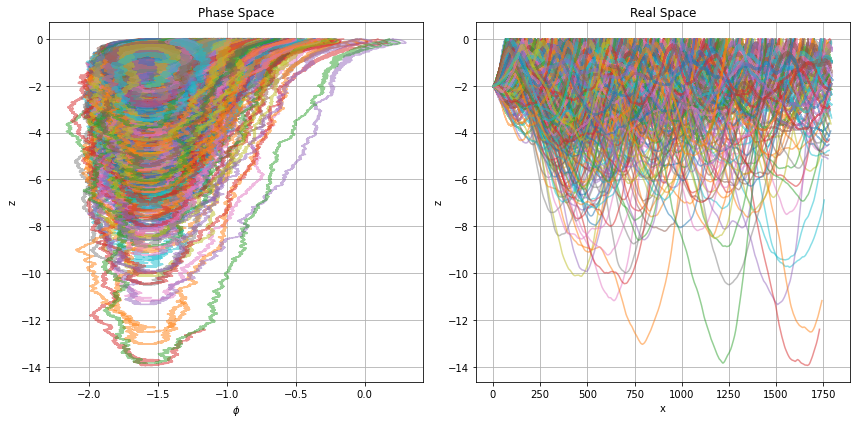

In [3]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.00001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 20000
dt = 0.1
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 1000

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]))*dt
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -2, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.5)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.5)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('longMS_manypaths2.png', dpi=300)
plt.show()

def save(paths, filename="manypaths2.npz"):
    
    xs = [p[0] for p in paths]
    zs = [p[1] for p in paths]
    phis = [p[2] for p in paths]

    np.savez(filename, xs=xs, zs=zs, phis=phis)


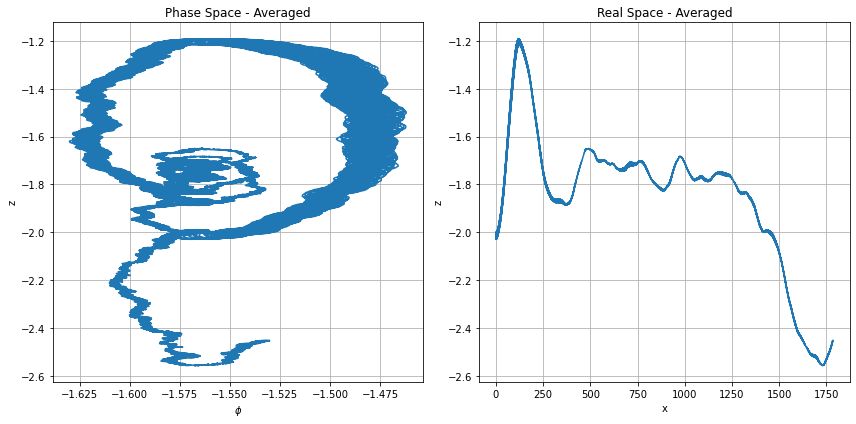

In [4]:
def average(paths, t):

    vpaths = []

    for x, z, phi in paths:
        if len(z) == len(t):
            vpaths.append((x, z, phi))

    xx, zz, pphi = [], [], []

    for x, z, phi in vpaths:
        xx.append(x)
        zz.append(z)
        pphi.append(phi)

    xx = np.array(xx)
    zz = np.array(zz)
    pphi = np.array(pphi)

    return xx.mean(axis=0), zz.mean(axis=0), pphi.mean(axis=0)
    
xm, zm, phim = average(paths, t)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(phim, zm)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space - Averaged')
ax1.grid()

ax2.plot(xm, zm)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space - Averaged')
ax2.grid()

plt.tight_layout() 
plt.savefig('longMS_average2.png', dpi=300)
plt.show()


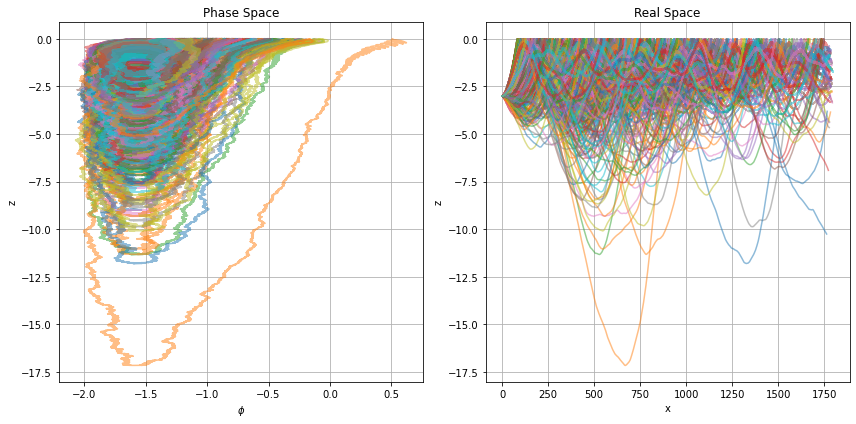

In [5]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.00001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 20000
dt = 0.1
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 1000

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]))*dt
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -3, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.5)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.5)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('longMS_manypaths3.png', dpi=300)
plt.show()

def save(paths, filename="manypaths3.npz"):
    
    xs = [p[0] for p in paths]
    zs = [p[1] for p in paths]
    phis = [p[2] for p in paths]

    np.savez(filename, xs=xs, zs=zs, phis=phis)


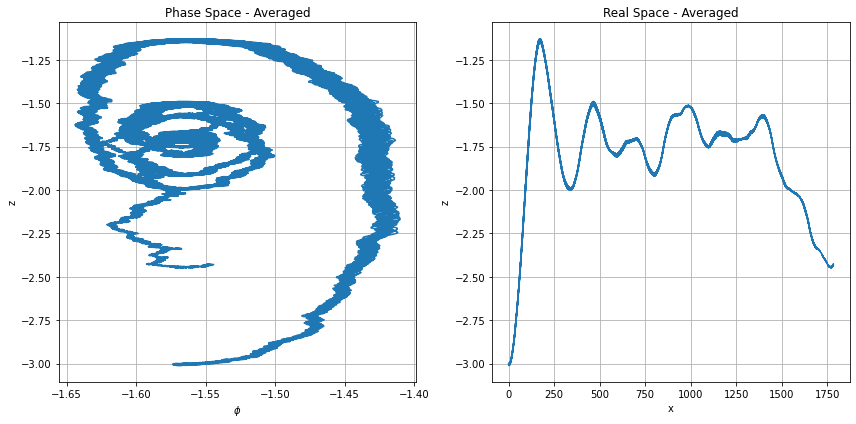

In [6]:
def average(paths, t):

    vpaths = []

    for x, z, phi in paths:
        if len(z) == len(t):
            vpaths.append((x, z, phi))

    xx, zz, pphi = [], [], []

    for x, z, phi in vpaths:
        xx.append(x)
        zz.append(z)
        pphi.append(phi)

    xx = np.array(xx)
    zz = np.array(zz)
    pphi = np.array(pphi)

    return xx.mean(axis=0), zz.mean(axis=0), pphi.mean(axis=0)
    
xm, zm, phim = average(paths, t)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(phim, zm)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space - Averaged')
ax1.grid()

ax2.plot(xm, zm)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space - Averaged')
ax2.grid()

plt.tight_layout() 
plt.savefig('longMS_average3.png', dpi=300)
plt.show()


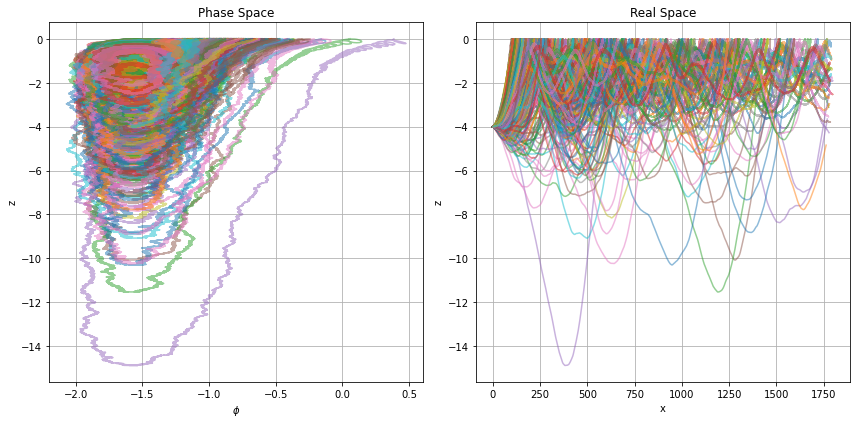

In [7]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.00001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 20000
dt = 0.1
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 1000

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]))*dt
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -4, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.5)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.5)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('longMS_manypaths4.png', dpi=300)
plt.show()

def save(paths, filename="manypaths4.npz"):
    
    xs = [p[0] for p in paths]
    zs = [p[1] for p in paths]
    phis = [p[2] for p in paths]

    np.savez(filename, xs=xs, zs=zs, phis=phis)


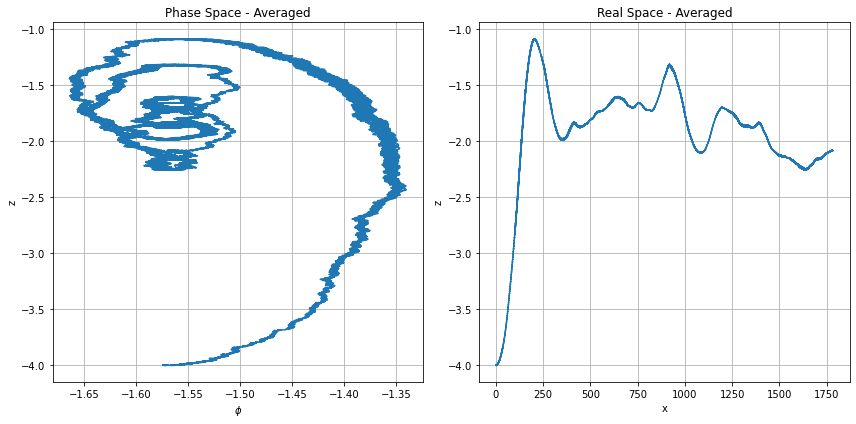

In [8]:
def average(paths, t):

    vpaths = []

    for x, z, phi in paths:
        if len(z) == len(t):
            vpaths.append((x, z, phi))

    xx, zz, pphi = [], [], []

    for x, z, phi in vpaths:
        xx.append(x)
        zz.append(z)
        pphi.append(phi)

    xx = np.array(xx)
    zz = np.array(zz)
    pphi = np.array(pphi)

    return xx.mean(axis=0), zz.mean(axis=0), pphi.mean(axis=0)
    
xm, zm, phim = average(paths, t)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(phim, zm)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space - Averaged')
ax1.grid()

ax2.plot(xm, zm)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space - Averaged')
ax2.grid()

plt.tight_layout() 
plt.savefig('longMS_average4.png', dpi=300)
plt.show()


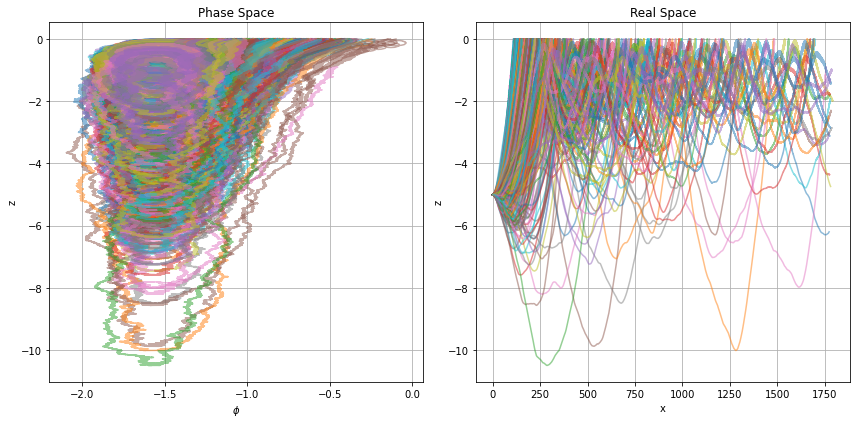

In [9]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.00001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 20000
dt = 0.1
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 1000

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]))*dt
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -5, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.5)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.5)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('longMS_manypaths5.png', dpi=300)
plt.show()

def save(paths, filename="manypaths5.npz"):
    
    xs = [p[0] for p in paths]
    zs = [p[1] for p in paths]
    phis = [p[2] for p in paths]

    np.savez(filename, xs=xs, zs=zs, phis=phis)


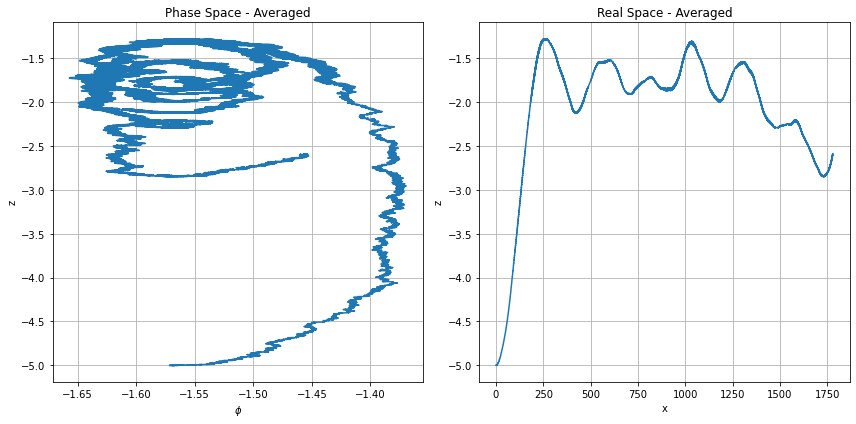

In [10]:
def average(paths, t):

    vpaths = []

    for x, z, phi in paths:
        if len(z) == len(t):
            vpaths.append((x, z, phi))

    xx, zz, pphi = [], [], []

    for x, z, phi in vpaths:
        xx.append(x)
        zz.append(z)
        pphi.append(phi)

    xx = np.array(xx)
    zz = np.array(zz)
    pphi = np.array(pphi)

    return xx.mean(axis=0), zz.mean(axis=0), pphi.mean(axis=0)
    
xm, zm, phim = average(paths, t)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(phim, zm)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space - Averaged')
ax1.grid()

ax2.plot(xm, zm)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space - Averaged')
ax2.grid()

plt.tight_layout() 
plt.savefig('longMS_average5.png', dpi=300)
plt.show()
